# *Datos Exploratorios*

*Daniel Felipe Soto Duque*  
*José Miguel Castañeda Bedoya*   
*Francisco Tolosa*


In [ ]:
import pandas as pd
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']="."

In [ ]:
!chmod 600 ./kaggle.json

In [ ]:
!kaggle competitions download -c udea-ai4eng-20242 --force

100% 20.1M/20.1M [00:00<00:00, 105MB/s] 
100% 20.1M/20.1M [00:00<00:00, 91.2MB/s]


In [ ]:
!unzip udea-ai4eng-20242.zip


Archive:  udea-ai4eng-20242.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: submission_example.csv  
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
z=pd.read_csv('train.csv')
z1=pd.read_csv('train.csv')

In [ ]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [ ]:
#Se extrae el valor de las columnas de nuestro dataframe
columnas=z.columns.values

columnas

array(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL'], dtype=object)

In [ ]:
# Calcula la cantidad de valores faltantes en cada columna del DataFrame 'z'
k = z.isna().sum()
# Selecciona solo aquellos elementos de la Serie 'k' que son diferentes de cero,
# lo que significa que solo se seleccionan las columnas que tienen al menos un valor faltante
k[k!=0]

,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664
ESTU_PAGOMATRICULAPROPIO,6498


In [ ]:
# Itera sobre cada columna del DataFrame 'z'
for c in z.columns:
    # Imprime el nombre de la columna y su tipo de datos ('dtype')
    print ("%20s"%c, z[c].dtype)

                  ID int64
             PERIODO int64
 ESTU_PRGM_ACADEMICO object
ESTU_PRGM_DEPARTAMENTO object
ESTU_VALORMATRICULAUNIVERSIDAD object
ESTU_HORASSEMANATRABAJA object
FAMI_ESTRATOVIVIENDA object
  FAMI_TIENEINTERNET object
 FAMI_EDUCACIONPADRE object
 FAMI_EDUCACIONMADRE object
ESTU_PAGOMATRICULAPROPIO object
  RENDIMIENTO_GLOBAL object


In [ ]:
# Obtiene las estadísticas descriptivas de las columnas numéricas del DataFrame 'z'
# usando el método describe(). T se utiliza para transponer las filas y columnas
# para que las estadísticas estén organizadas por columnas en lugar de por filas.
z._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
ID,692500.0,494606.130576,285585.209455,1.0,247324.75,494564.5,741782.5,989286.0
PERIODO,692500.0,20198.366679,10.535037,20183.0,20195.00,20195.0,20203.0,20213.0


In [ ]:
# Lista de columnas a incluir en el nuevo DataFrame de unicamente columnas categóricas
columnas_nuevas = ['ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL']

# Crear un nuevo DataFrame con las columnas especificadas
nuevo_df = z.loc[:, columnas_nuevas]

# Mostrar las primeras filas del nuevo DataFrame
print(nuevo_df.head())

  ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                 BOGOTÁ  Entre 5.5 millones y menos de 7 millones   
1              ATLANTICO  Entre 2.5 millones y menos de 4 millones   
2                 BOGOTÁ  Entre 2.5 millones y menos de 4 millones   
3              SANTANDER  Entre 4 millones y menos de 5.5 millones   
4              ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   

  ESTU_HORASSEMANATRABAJA FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0       Menos de 10 horas            Estrato 3                 Si   
1                       0            Estrato 3                 No   
2         Más de 30 horas            Estrato 3                 Si   
3                       0            Estrato 4                 Si   
4     Entre 21 y 30 horas            Estrato 3                 Si   

                  FAMI_EDUCACIONPADRE                 FAMI_EDUCACIONMADRE  \
0    Técnica o tecnológica incompleta                           Postgrado   
1      Téc

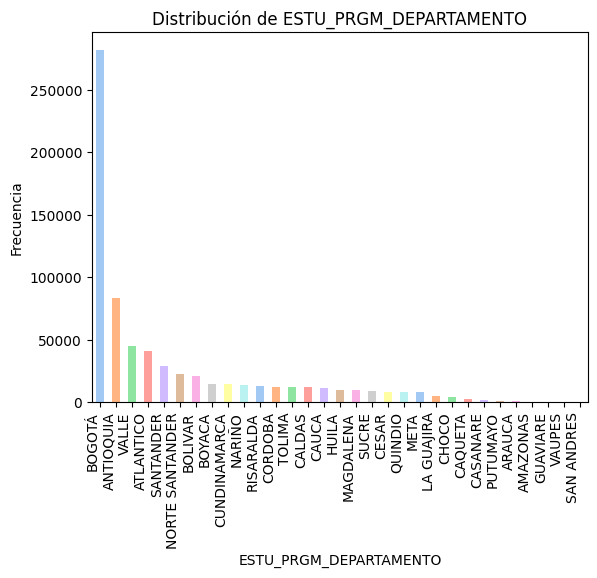

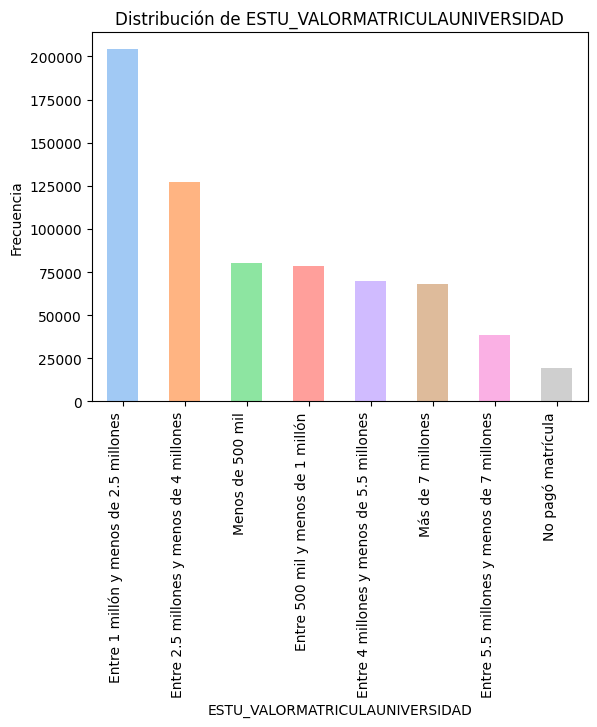

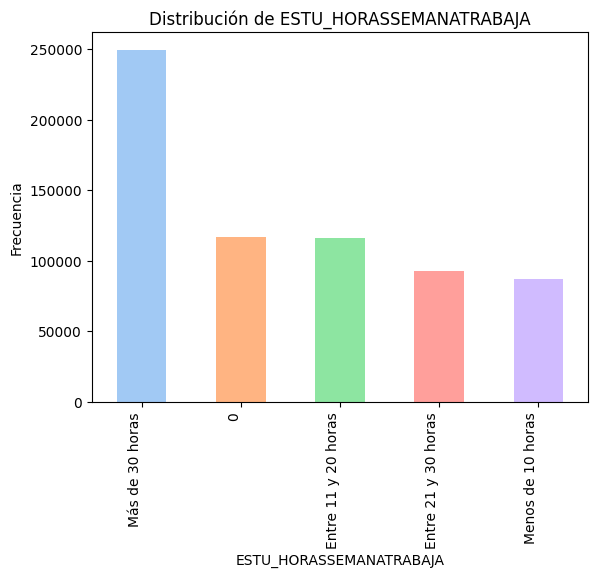

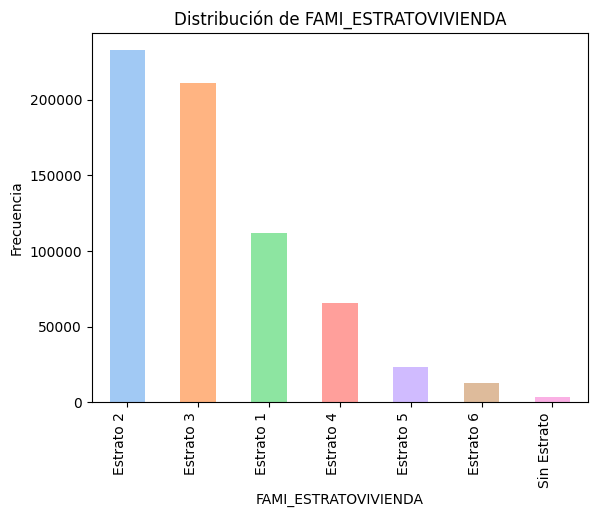

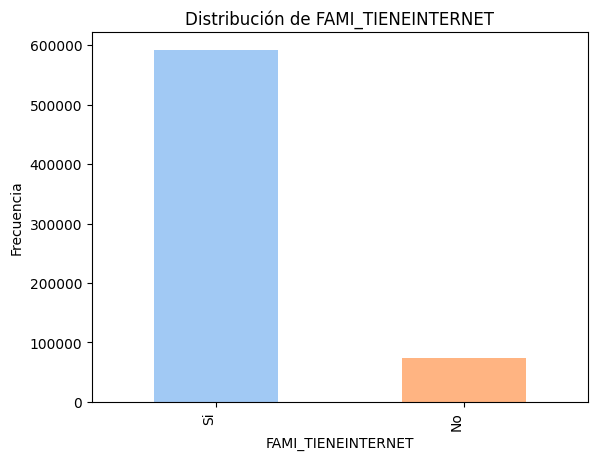

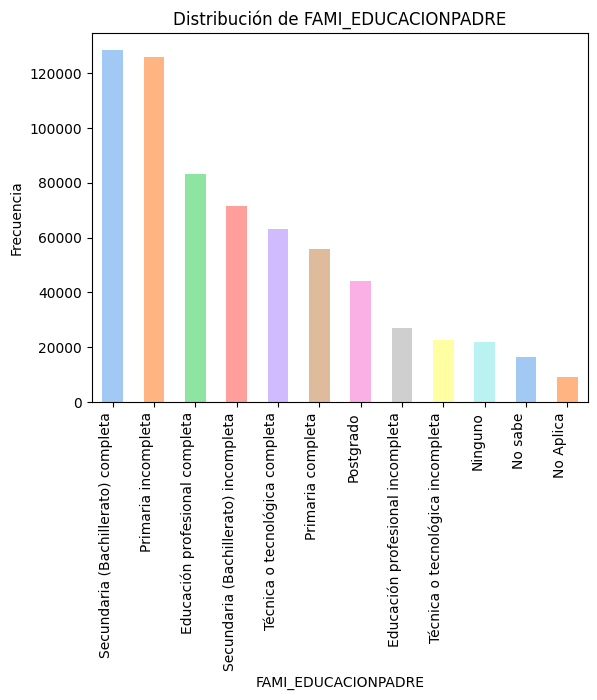

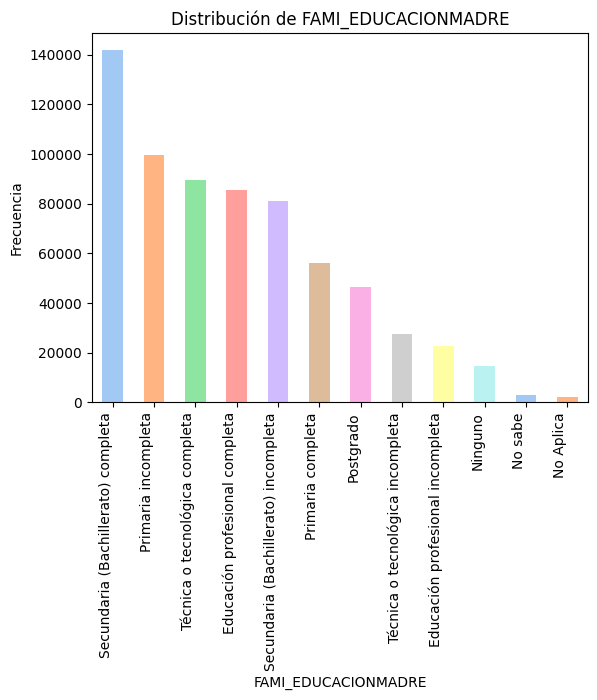

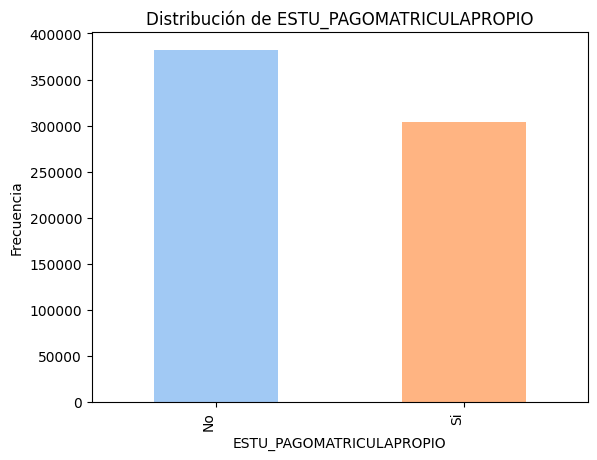

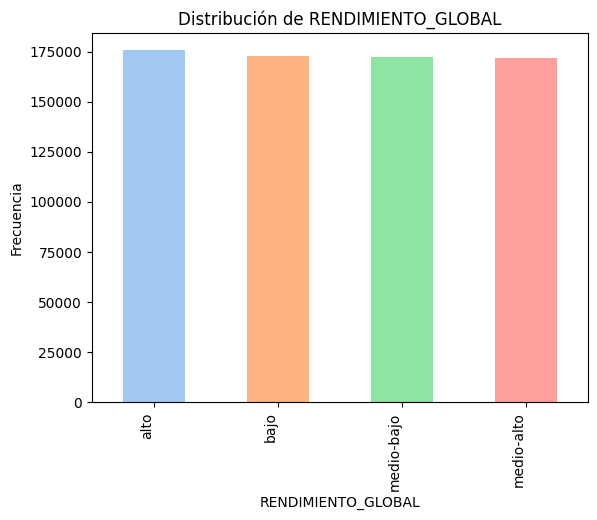

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de la paleta de colores pastel
paleta_colores = sns.color_palette('pastel')

# Itera sobre cada columna del DataFrame
for columna in nuevo_df.columns:
    # Verifica si la columna es numérica
    if nuevo_df[columna].dtype in ['int64', 'float64']:
        # Histograma de variables numéricas
        plt.hist(nuevo_df[columna], bins=20, color=paleta_colores[0])  # Color pastel para el histograma
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.title(f'Distribución de {columna}')
        plt.show()
    else:
        # Diagrama de barras de variables categóricas con colores pastel y rotación de etiquetas
        nuevo_df[columna].value_counts().plot(kind='bar', color=paleta_colores)
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.title(f'Distribución de {columna}')
        plt.xticks(rotation=90, ha='right')  # Rotar etiquetas del eje X para mejor legibilidad
        plt.show()


identificamos las columnas que deberían ser categóricas:

In [ ]:
categorical_columns = [
    'ESTU_PRGM_ACADEMICO',
    'ESTU_PRGM_DEPARTAMENTO',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_TIENEINTERNET',
    'FAMI_EDUCACIONPADRE',
    'FAMI_EDUCACIONMADRE',
    'ESTU_PAGOMATRICULAPROPIO',
    'RENDIMIENTO_GLOBAL'
]

for col in categorical_columns:
    z[col] = z[col].astype('category')


Las columnas como ESTU_VALORMATRICULAUNIVERSIDAD y ESTU_HORASSEMANATRABAJA contienen valores numéricos en formato de texto. Serán convertidas a formatos numericos

In [ ]:
import pandas as pd
import numpy as np

def convert_to_numeric(column):
    # Elimina caracteres no numéricos y convierte a número
    column = column.replace({'Entre': '', 'y menos de': '', 'menos de': '', 'millones': '', ',': ''}, regex=True)
    column = column.str.extract('(\d+)', expand=False).astype(float)
    return column

z1['ESTU_VALORMATRICULAUNIVERSIDAD'] = convert_to_numeric(z1['ESTU_VALORMATRICULAUNIVERSIDAD'])
z1['ESTU_HORASSEMANATRABAJA'] = convert_to_numeric(z1['ESTU_HORASSEMANATRABAJA'])


In [ ]:
rendimiento_mapping = {
    'bajo': 0,
    'medio-bajo': 1,
    'medio-alto': 2,
    'alto': 3
}

z1['RENDIMIENTO_GLOBAL'] = z1['RENDIMIENTO_GLOBAL'].map(rendimiento_mapping)


In [ ]:
print(z1.dtypes)
print(z1.head())


ID                                  int64
PERIODO                             int64
ESTU_PRGM_ACADEMICO                object
ESTU_PRGM_DEPARTAMENTO             object
ESTU_VALORMATRICULAUNIVERSIDAD    float64
ESTU_HORASSEMANATRABAJA           float64
FAMI_ESTRATOVIVIENDA               object
FAMI_TIENEINTERNET                 object
FAMI_EDUCACIONPADRE                object
FAMI_EDUCACIONMADRE                object
ESTU_PAGOMATRICULAPROPIO           object
RENDIMIENTO_GLOBAL                  int64
dtype: object
       ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0  904256    20212                  ENFERMERIA                 BOGOTÁ   
1  645256    20212                     DERECHO              ATLANTICO   
2  308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTÁ   
3  470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4  989032    20212                  PSICOLOGIA              ANTIOQUIA   

   ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HOR

In [ ]:
print(z1['RENDIMIENTO_GLOBAL'].unique())


[2 0 3 1]


<ipython-input-57-a7d36f09f3a5>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




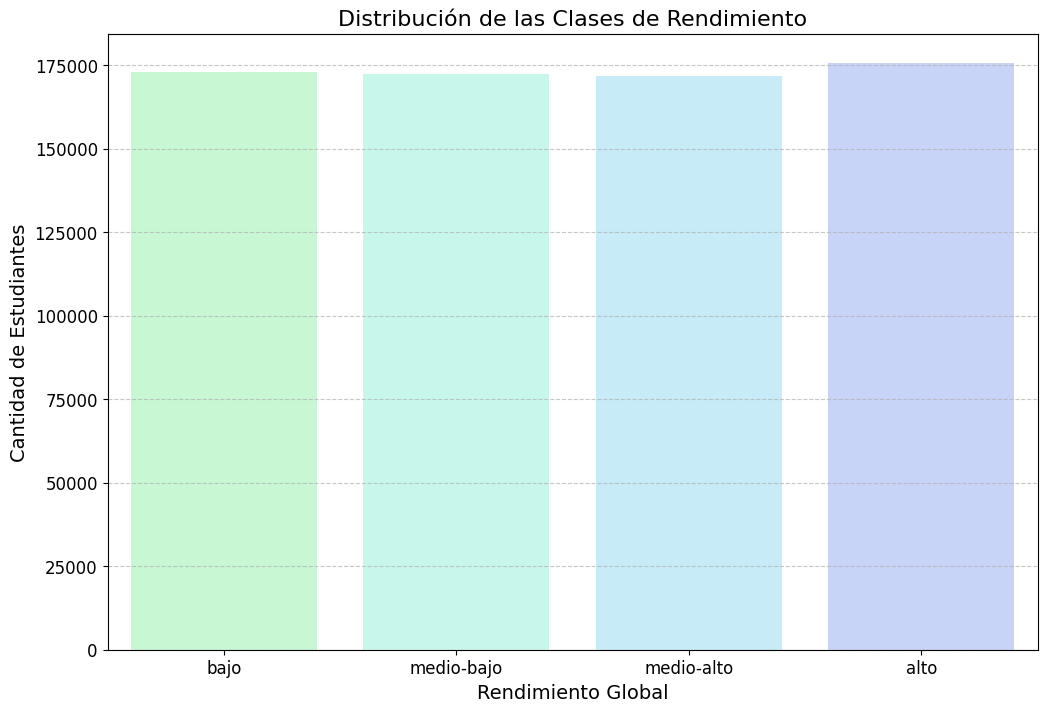

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el orden de las categorías y colores
rendimiento_order = [0, 1, 2, 3]  # Asegúrate de que estos valores coincidan con los valores únicos
rendimiento_labels = ['bajo', 'medio-bajo', 'medio-alto', 'alto']
colors = ['#bfffcf', '#bfffef', '#bfefff', '#bfcfff']

# Visualización de la distribución de las clases de rendimiento
plt.figure(figsize=(12, 8))
sns.countplot(x='RENDIMIENTO_GLOBAL', data=z1, order=rendimiento_order, palette=colors)
plt.title('Distribución de las Clases de Rendimiento', fontsize=16)
plt.xlabel('Rendimiento Global', fontsize=14)
plt.ylabel('Cantidad de Estudiantes', fontsize=14)
plt.xticks(ticks=range(len(rendimiento_order)), labels=rendimiento_labels, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import pandas as pd

# Calcular las proporciones de cada programa académico
programas_academicos_counts = z1['ESTU_PRGM_ACADEMICO'].value_counts()
programas_academicos_percentages = 100 * programas_academicos_counts / programas_academicos_counts.sum()

# Crear un DataFrame para los porcentajes
df_percentages = pd.DataFrame({
    'Programa Académico': programas_academicos_percentages.index,
    'Porcentaje': programas_academicos_percentages.values
})

# Mostrar el DataFrame con porcentajes
print(df_percentages)


                                    Programa Académico  Porcentaje
0                                              DERECHO    7.688664
1                           ADMINISTRACION DE EMPRESAS    7.494874
2                                   CONTADURIA PUBLICA    5.727653
3                                           PSICOLOGIA    4.611119
4                                INGENIERIA INDUSTRIAL    4.112780
..                                                 ...         ...
943                LICENCIATURA EN ESPAÑOL Y FILOLOGÍA    0.000144
944         ADMINISTRACION EN NEGOCIOS INTERNACIONALES    0.000144
945                ADMINISTRACION DE COMERCIO EXTERIOR    0.000144
946  LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y ...    0.000144
947              PROFESIONAL EN INVESTIGACIÓN CRIMINAL    0.000144

[948 rows x 2 columns]


Para efectos de visualizacion se decidio graficar los programas que tienen una incidencia superior al 1% los demas fueron agrupados en una seccion "otros"


<ipython-input-49-a86df4dda05a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Programa Académico', x='Porcentaje', data=df_plot, palette='viridis')


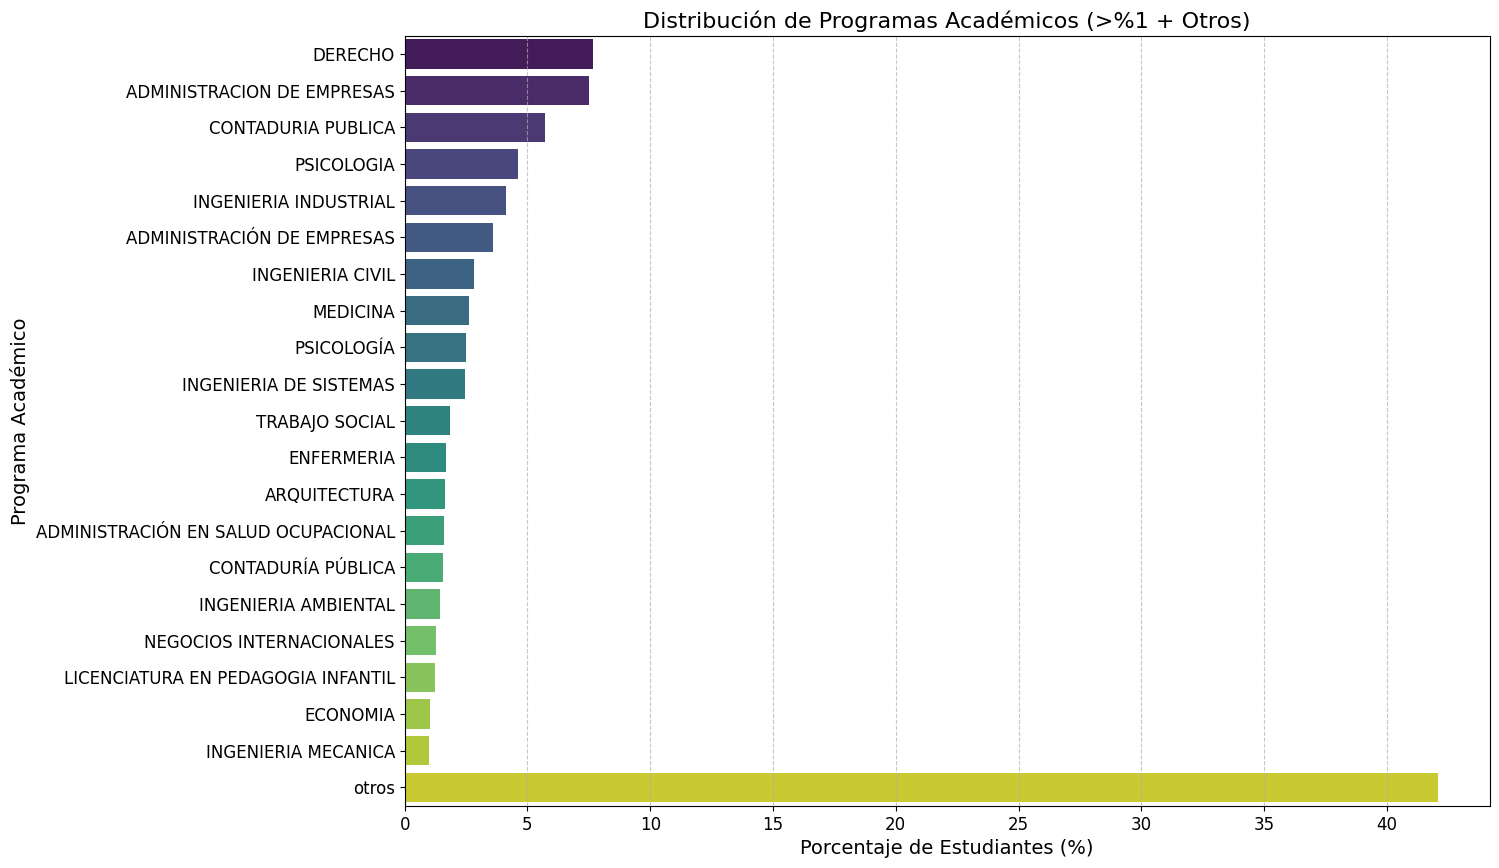

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar programas académicos con porcentaje superior al 1%
df_above_1_percent = df_percentages[df_percentages['Porcentaje'] > 1]

# Agrupar el resto en "otros"
otros_percentage = df_percentages[df_percentages['Porcentaje'] <= 1]['Porcentaje'].sum()
otros_df = pd.DataFrame({
    'Programa Académico': ['otros'],
    'Porcentaje': [otros_percentage]
})

# Concatenar los programas con más del 1% con la categoría "otros"
df_plot = pd.concat([df_above_1_percent, otros_df])

# Visualización
plt.figure(figsize=(14, 10))
sns.barplot(y='Programa Académico', x='Porcentaje', data=df_plot, palette='viridis')
plt.title('Distribución de Programas Académicos (>%1 + Otros)', fontsize=16)
plt.xlabel('Porcentaje de Estudiantes (%)', fontsize=14)
plt.ylabel('Programa Académico', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
!pip install plotly


Podemos apreciar la cantidad de estudiantes por programa academico a continuacion :

In [ ]:
import plotly.express as px
import pandas as pd

# Filtrar programas académicos con porcentaje superior al 0.05%
df_above_0_05_percent = df_percentages[df_percentages['Porcentaje'] > 0.05]

# Agrupar el resto en "otros"
otros_percentage = df_percentages[df_percentages['Porcentaje'] <= 0.05]['Porcentaje'].sum()
otros_df = pd.DataFrame({
    'Programa Académico': ['otros'],
    'Porcentaje': [otros_percentage]
})

# Concatenar los programas con más del 0.05% con la categoría "otros"
df_plot = pd.concat([df_above_0_05_percent, otros_df])

# Crear un DataFrame para el treemap
df_plot['Porcentaje'] = df_plot['Porcentaje']  # Asegúrate de que el porcentaje esté en formato adecuado

# Crear el treemap con etiquetas
fig = px.treemap(df_plot,
                 path=['Programa Académico'],
                 values='Porcentaje',
                 title='Distribución de Programas Académicos',
                 color='Porcentaje',  # Colorear según el porcentaje
                 color_continuous_scale='Viridis',  # Puedes cambiar el esquema de color
                 custom_data=['Programa Académico', 'Porcentaje'])  # Añadir datos personalizados

# Actualizar el diseño para mostrar etiquetas
fig.update_traces(
    textinfo="label+text",  # Mostrar el nombre y el porcentaje
    texttemplate="%{label}: %{customdata[1]:.2f}%"  # Formatear el porcentaje
)

# Mostrar el treemap
fig.show()


Se obtiene la siguiente figura en la cual se logra discriminar el porcentaje de la carrera con respecto a la totalidad de los datos y para mejor visualización al dar click en cada cuadro este se abre para así mostrar la información correspondiente para cada programa de estudio.

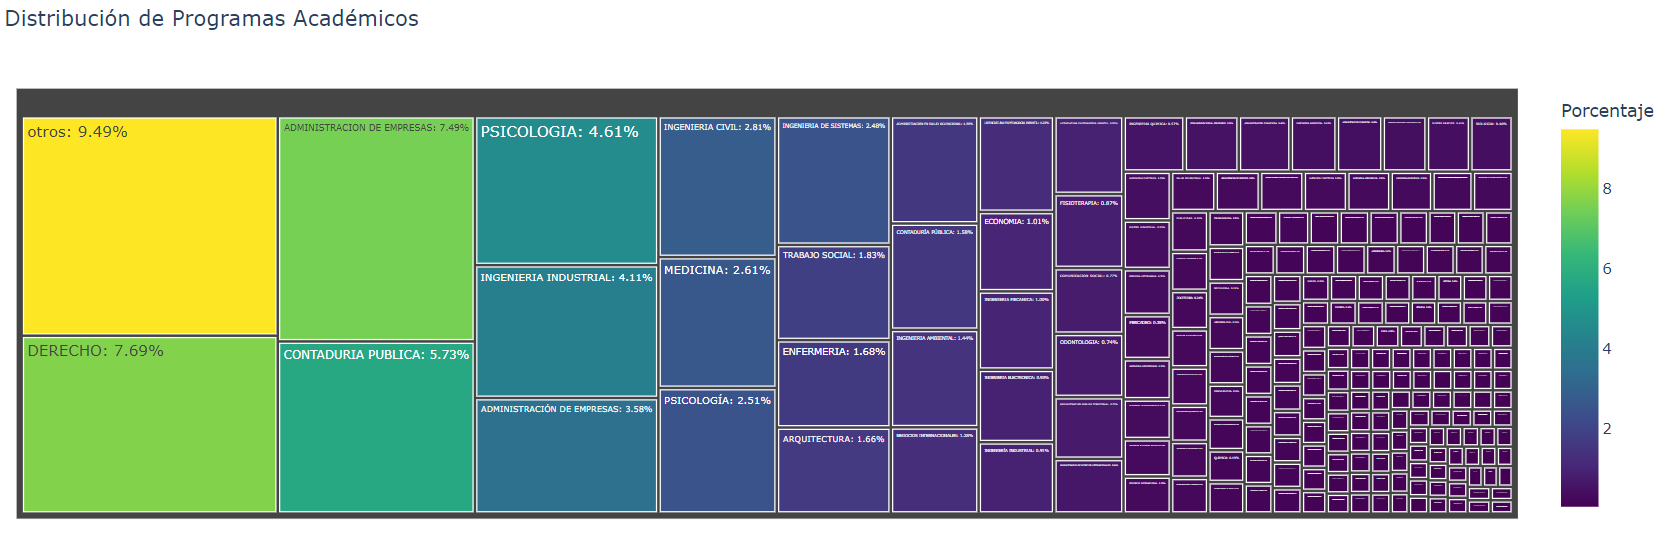



Finalmente se evalua el promedio de horas de estudio con respecto al rendimiento global, lo cual puede ser un bien indicativo a usar en el modelo posteriormente

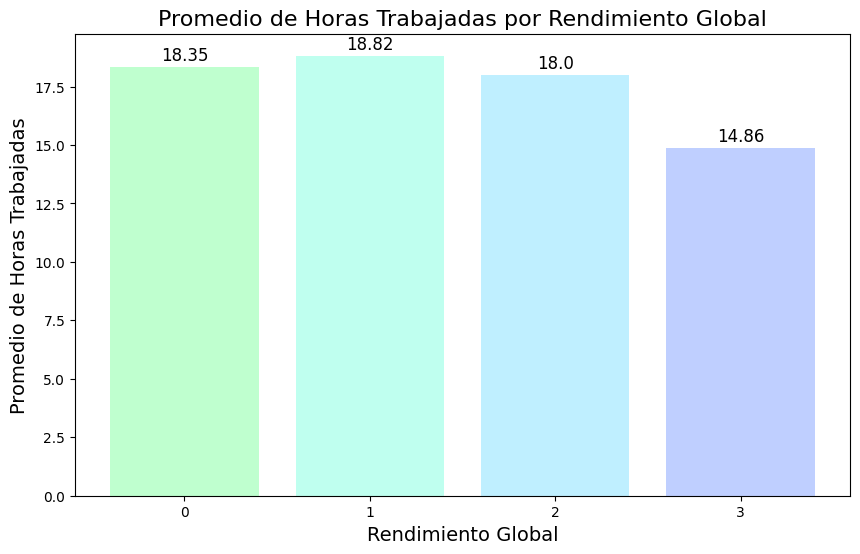

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el promedio de horas trabajadas para cada categoría de rendimiento
mean_hours_per_performance = z1.groupby('RENDIMIENTO_GLOBAL')['ESTU_HORASSEMANATRABAJA'].mean().reset_index()

# Etiquetas y valores para el gráfico
labels = mean_hours_per_performance['RENDIMIENTO_GLOBAL'].astype(str).tolist()
values = mean_hours_per_performance['ESTU_HORASSEMANATRABAJA'].tolist()

# Definir manualmente los colores para cada barra (puedes ajustar estos colores a tu gusto)
colores = ['#bfffcf', '#bfffef', '#bfefff', '#bfcfff']  # Asegúrate de tener suficientes colores

# Crear el gráfico de barras con los colores definidos
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colores[:len(labels)])  # Se usa solo el número de colores necesario

# Añadir etiquetas y título
plt.xlabel('Rendimiento Global', fontsize=14)
plt.ylabel('Promedio de Horas Trabajadas', fontsize=14)
plt.title('Promedio de Horas Trabajadas por Rendimiento Global', fontsize=16)

# Añadir los valores sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.show()
